# Multiple Linear Regression - Bike Sharing Assignment

###### Created by - Chandrasekaran B - <href> https://github.com/cskn1097 </href>
   
### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The model built to be built is for predicting the following,
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

### Note: This solution of problem statement follows a CRISP-DM approach

## Importing libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for linear regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

#ignoring unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## STEP 1: Reading and Understanding the data

In [2]:
#reading CSV
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Getting info of the data frame to look at null data and data types
df.info()

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday      

    *From the info we can conclude that there are no null values present in any of the columns so handilng of null values is not required

In [4]:
#looking at the numerical data and stats
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## STEP 2: Data Cleaning and Imputation

In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Cleaning the columns that are not necessary

1. instant : It is just a row index

2. dteday : This has the date, Since we already have seperate columns for 'year' & 'month' we can neglect this

3. casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

In [7]:
# Droping instant column 
df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday column
df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns

df.drop(['casual'], axis = 1, inplace = True)
df.drop(['registered'], axis = 1, inplace = True)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Outlier detection

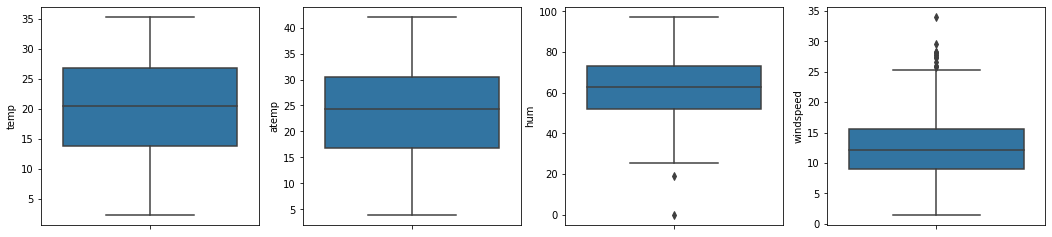

In [8]:
# box plots for indepent variables with continuous values
col = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for c in col:
    plt.subplot(1,4,i)
    sns.boxplot(y=c, data=df)
    i+=1

    There are no major outliers detected in the data, very few were detected in windspeed and hum, but we can neglect them 
    as they are within the limits

## STEP 3: Exploratory Data Analysis and Data Visualization

In [9]:
#replacing categorical columns with numbers to create dummy variables out of it
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df.weathersit.replace({1:'good_weather',2:'moderate_weather',3:'bad_weather',4:'severe_weather'},inplace = True)

df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

df.weekday.replace({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'},inplace = True)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate_weather,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate_weather,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good_weather,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good_weather,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good_weather,9.305237,11.46350,43.6957,12.522300,1600


### Visualizing Data

<Figure size 1080x2160 with 0 Axes>

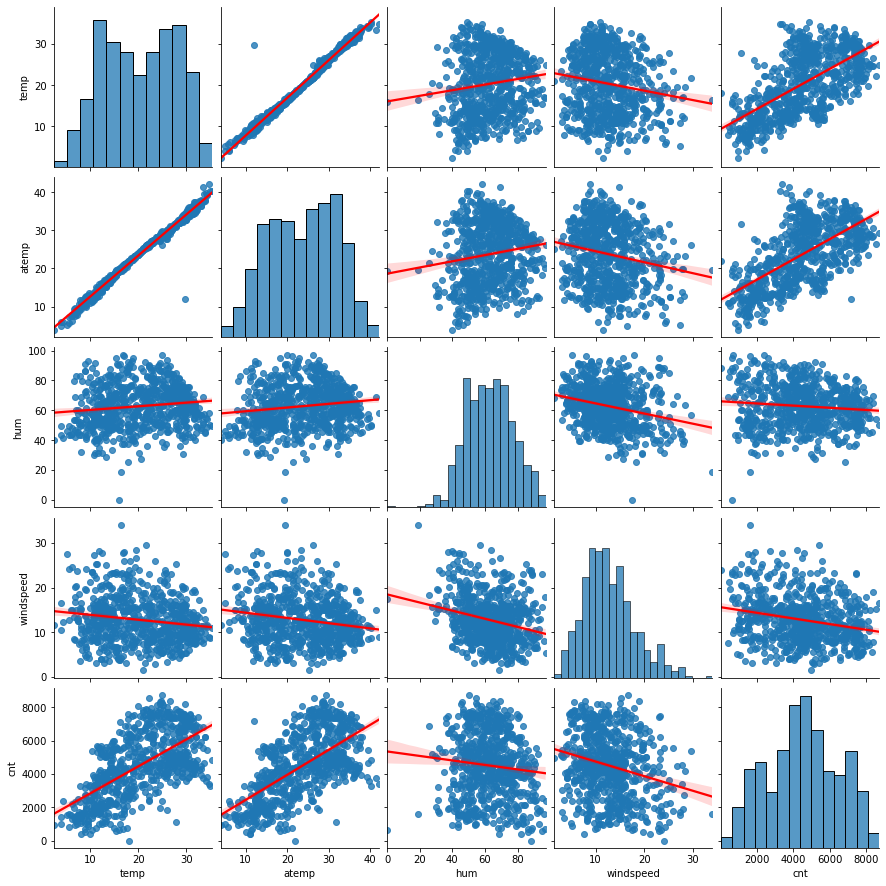

In [10]:
# Analysing/visualizing the numerical columns
plt.figure(figsize = (15,30))

sns.pairplot(data=df,vars=['temp','atemp','hum','windspeed','cnt'], kind ='reg',plot_kws={'line_kws':{'color':'red'}})
plt.show()

#### Observations:

- Atemp and temp seems to follow more linear relation with cnt than anyother predictor variable

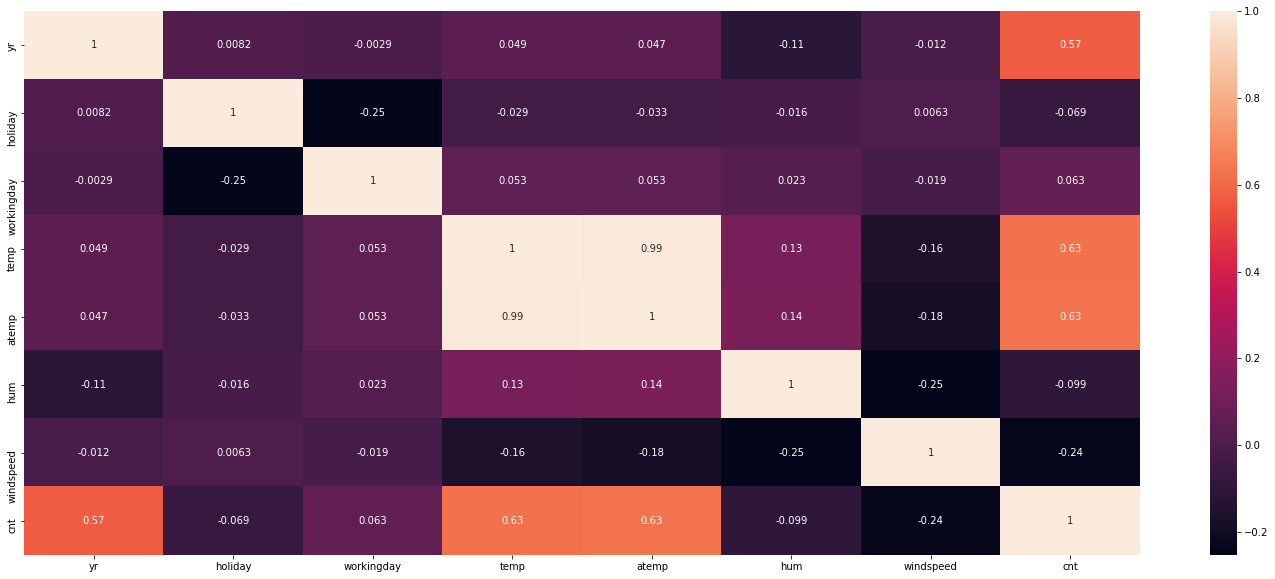

In [11]:
#Draw Heatmap of correlation for entire dataframe

plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Observations:

1. atemp and temp are highly correlated with each other leading to multicollinearity of the model, we can drop them after train test split

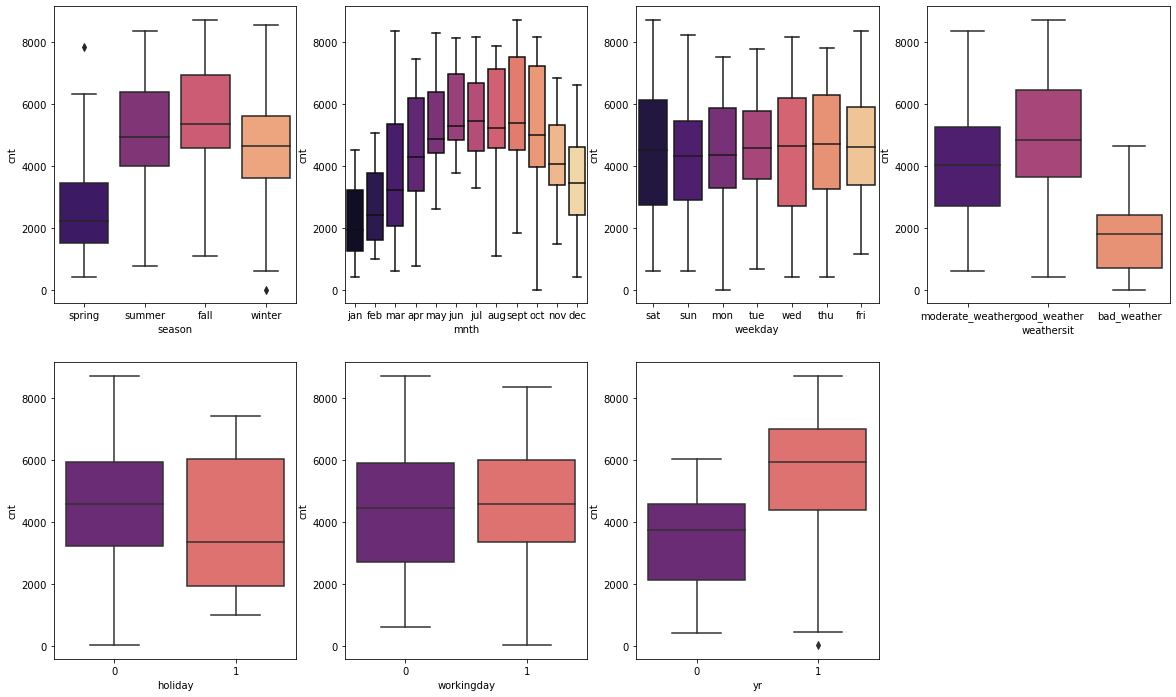

In [12]:
# Analysing/visualizing the categorical columns to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df, palette = 'magma')
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df, palette = 'magma')
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df, palette = 'magma')
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df,  palette = 'magma')
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df,palette = 'magma')
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df,palette = 'magma')
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df,palette = 'magma')
plt.show()

#### Observations:

1. Summer and fall season has more demands for bike, after fall season probably after september we could see a reduction in demand.
2. Demand is in increasing trend on YOY
3. Demand decreases during holidays and rainy seasons
4. if the weather is bad (light - severe rains) then deman is falling very drastically

## STEP 4: Preparing the Data for modelling

In [13]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.mnth,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)

#for weathersit we need bad weather, so we will not user drop_first we will drop the other variable with RFE or manual approach
weathersit_df=pd.get_dummies(df.weathersit)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [14]:
df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sun,thu,tue,wed,bad_weather,good_weather,moderate_weather,spring,summer,winter
0,spring,0,jan,0,sat,0,moderate_weather,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,moderate_weather,14.902598,17.68695,69.6087,...,1,0,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,good_weather,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,1,0,0
3,spring,0,jan,0,tue,1,good_weather,8.200000,10.60610,59.0435,...,0,0,1,0,0,1,0,1,0,0
4,spring,0,jan,0,wed,1,good_weather,9.305237,11.46350,43.6957,...,0,0,0,1,0,1,0,1,0,0


In [15]:
# dropping the columns which we created them as dummies

df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sun,thu,tue,wed,bad_weather,good_weather,moderate_weather,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,1,0,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,1,0,1,0,1,0,0


## STEP 5: Train Test Split and Scaling

### Train Test Split

In [16]:
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state =100)
print(df_train.shape)
print(df_test.shape)
df_train.head()

(510, 31)
(220, 31)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sun,thu,tue,wed,bad_weather,good_weather,moderate_weather,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,1,0,0,1,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,1,0,0,0,0,1,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


### Scaling

Min-max scaling (normalisation)

(x - xmin)/(xmax-xmin)

In [17]:
#instantiating the object

scaler = MinMaxScaler()

#creating a list of numeric variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

#fitting and transforming data to instance

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

#verifying minmax scaling
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sun,thu,tue,wed,bad_weather,good_weather,moderate_weather,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.143137,0.133333,0.131373,0.158824,0.029412,0.625490,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.350557,0.340268,0.338139,0.365870,0.169124,0.484471,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


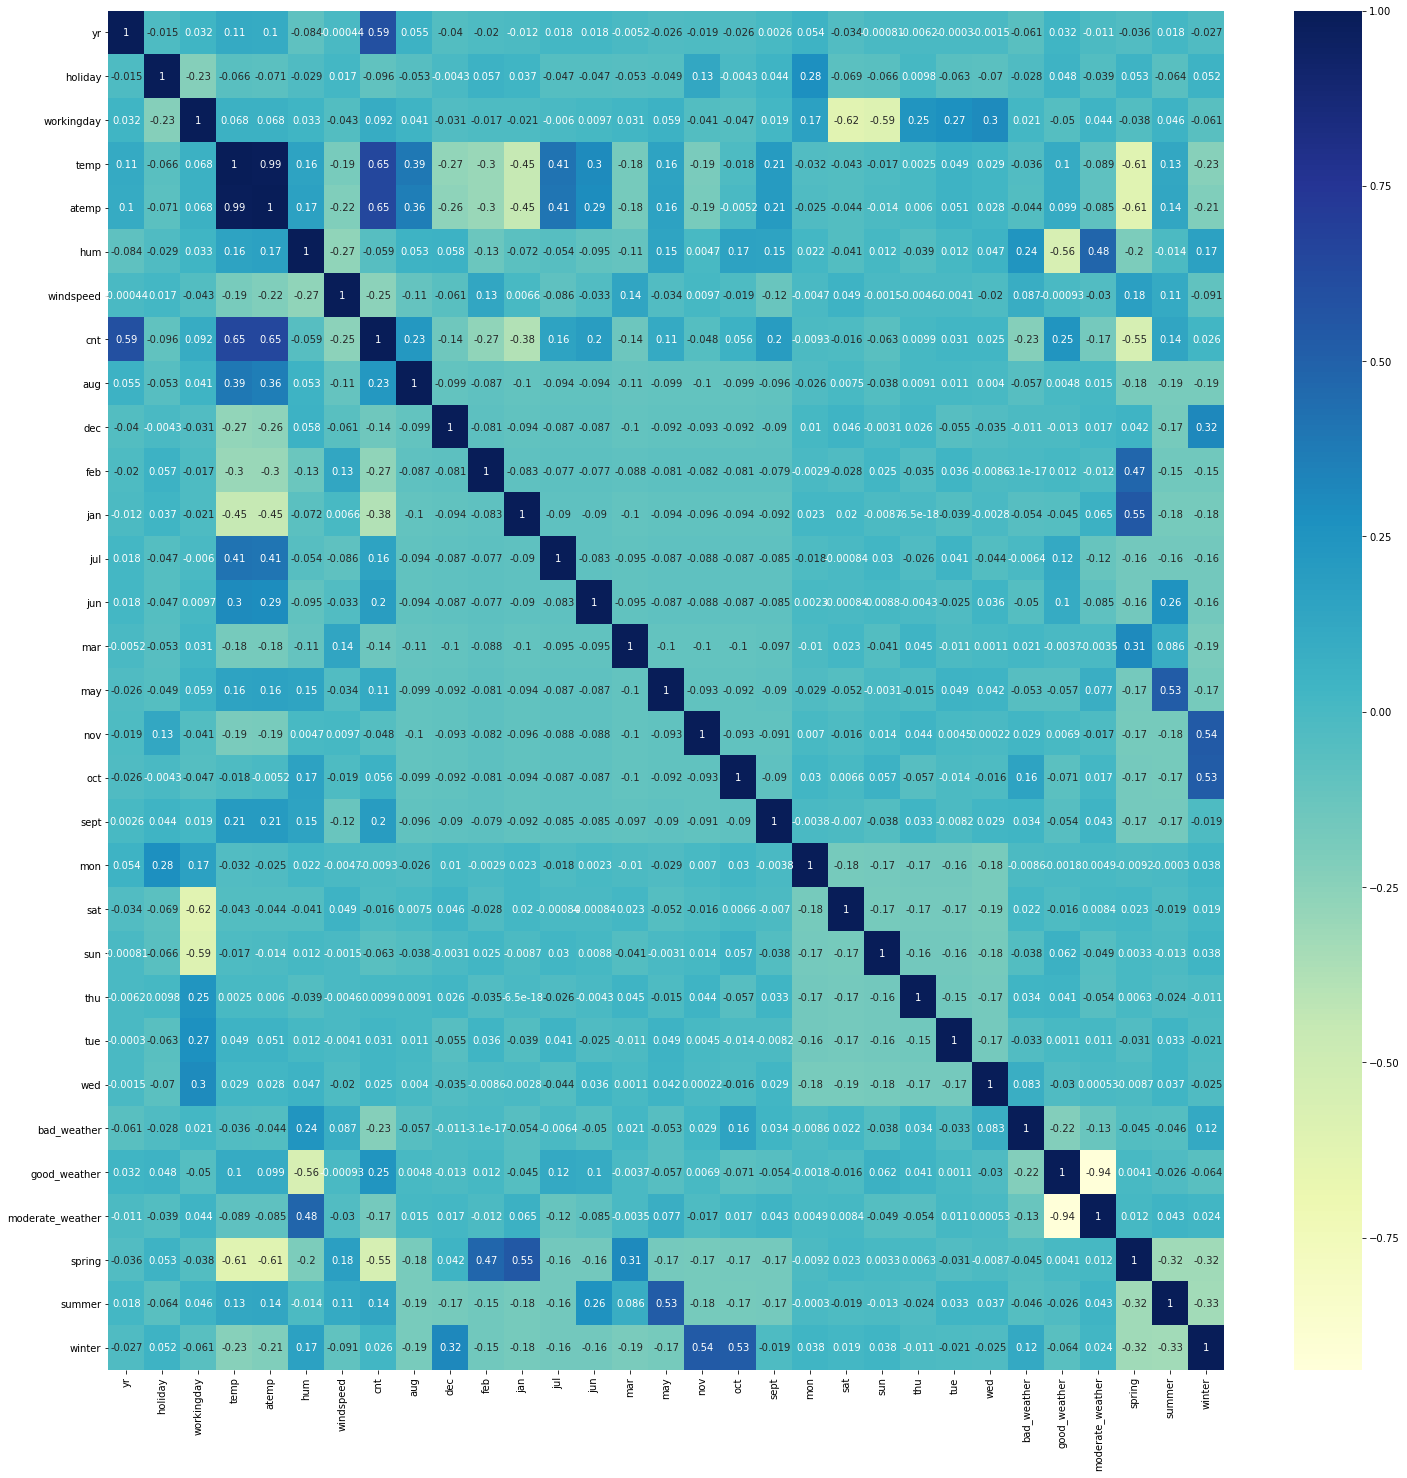

In [18]:
# visualizing heat map after scaling

plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [19]:
#dropping atemp because atemp and temp are high correlated with each other which leads to multicollinearity of the model

df_train =  df_train.drop('atemp',axis = 1)
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sun,thu,tue,wed,bad_weather,good_weather,moderate_weather,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,1,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,1,0,0,0,0,1,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,0,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,0,0,...,0,0,0,0,0,0,1,0,1,0


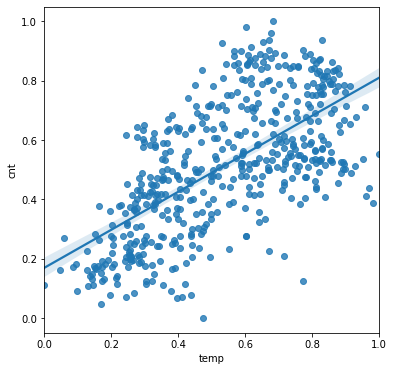

In [20]:
# Visualizing one of the count correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
sns.regplot(df_train.temp, df_train.cnt)
plt.show()

## STEP 6: Model Building

In [21]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

### Recursive Feature elimination

In [22]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 4),
 ('dec', False, 12),
 ('feb', False, 9),
 ('jan', False, 3),
 ('jul', True, 1),
 ('jun', False, 11),
 ('mar', False, 7),
 ('may', False, 6),
 ('nov', False, 5),
 ('oct', False, 13),
 ('sept', True, 1),
 ('mon', False, 14),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 10),
 ('tue', False, 8),
 ('wed', False, 15),
 ('bad_weather', True, 1),
 ('good_weather', True, 1),
 ('moderate_weather', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1)]

In [23]:
#assigning the columns selected by RFE to a list
col = X_train.columns[rfe.support_]
print(col.sort_values)

<bound method Index.sort_values of Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jul',
       'sept', 'sat', 'sun', 'bad_weather', 'good_weather', 'moderate_weather',
       'spring', 'winter'],
      dtype='object')>


In [24]:
# dataframe with RFE selected features

X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,jul,sept,sat,sun,bad_weather,good_weather,moderate_weather,spring,winter
576,1,0,1,0.815169,0.725633,0.264686,1,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,1,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,1,0,1,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,1,0,0,0,1,0,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

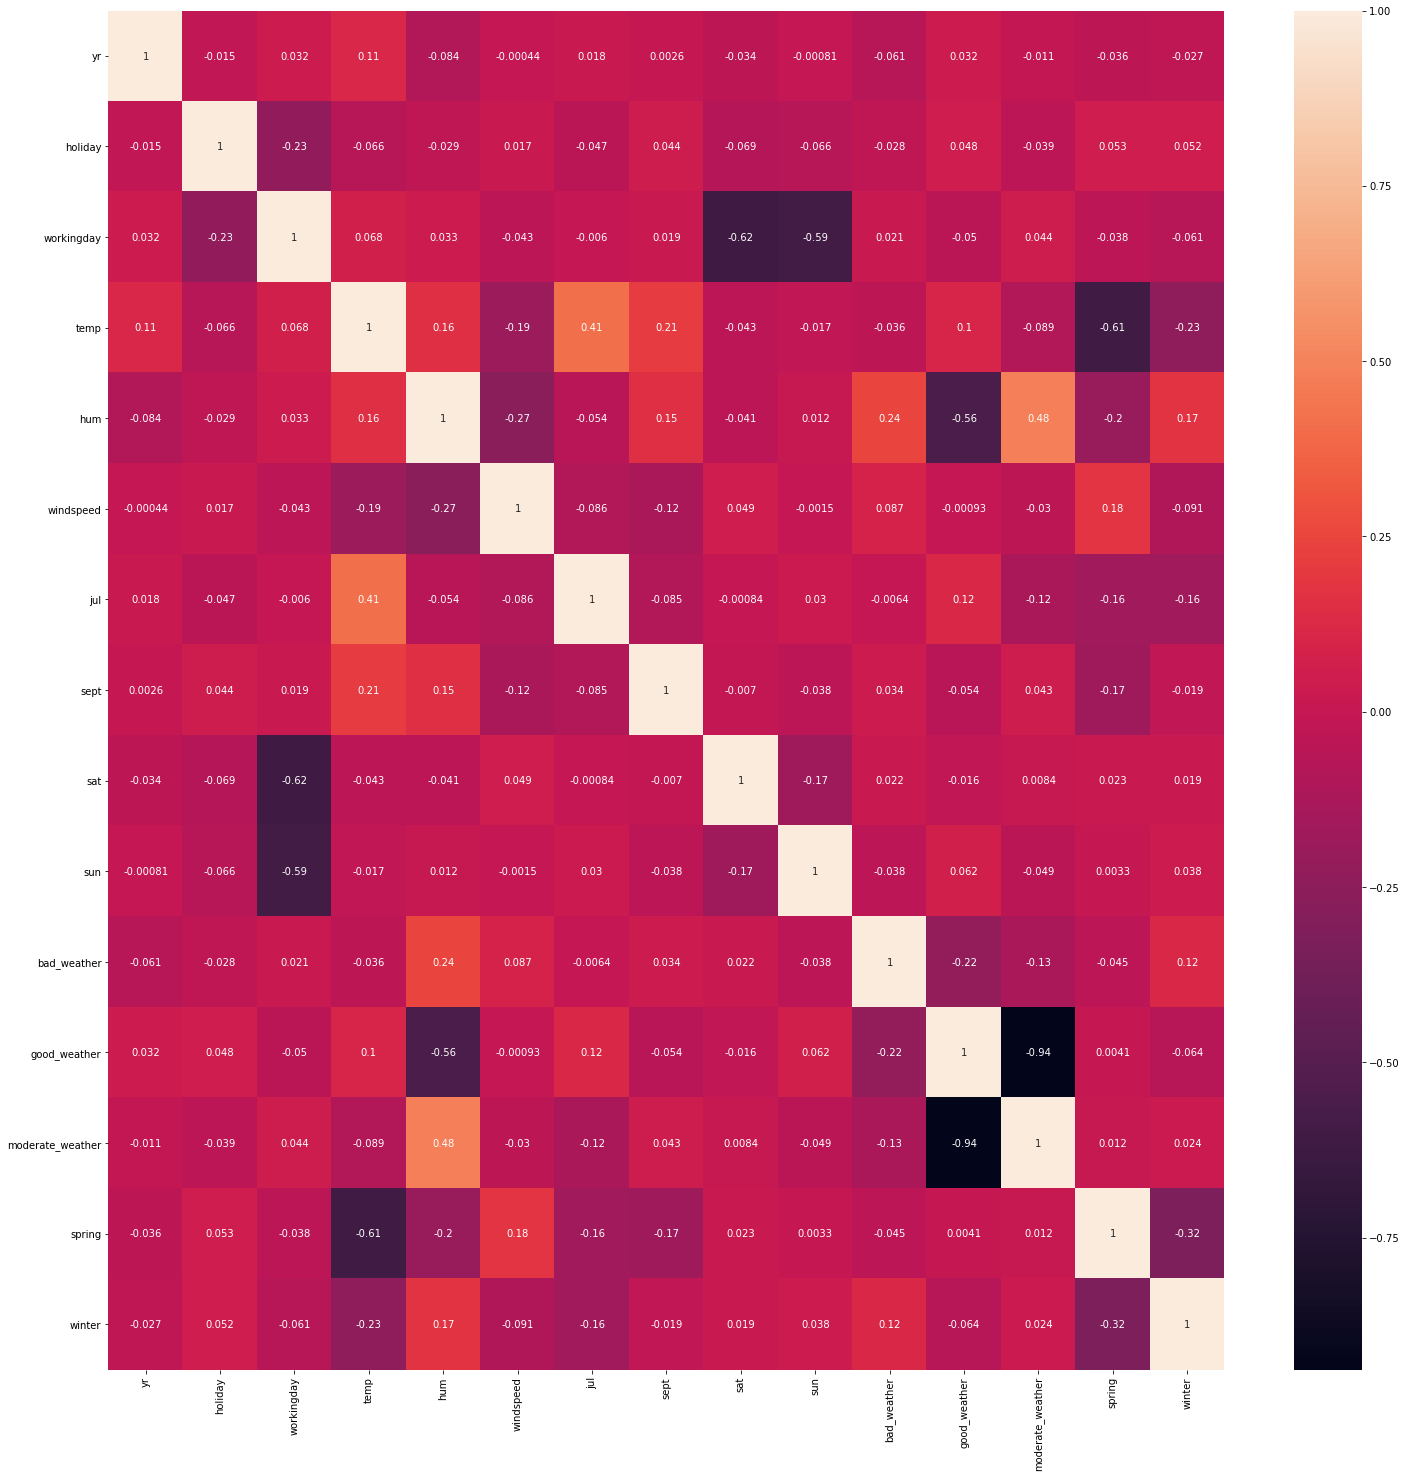

In [25]:
#heatmap of RFE selected columns
plt.figure(figsize = (25,25))
sns.heatmap(X_train_rfe.corr(),annot= True)

#### Observations:
- working day, good weather, humidity, and few other variables has multicollinearity, should be handles with VIF and p value

In [26]:
#calculating VIF for the features in X_train_rfe
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
1,holiday,inf
2,workingday,inf
8,sat,inf
9,sun,inf
10,bad_weather,inf
11,good_weather,inf
12,moderate_weather,inf
3,temp,2.993028
13,spring,2.545046
4,hum,1.889156


### Linear model iteration to find a best model by manual elimination of features selected by RFE.

- Order of elimination
    1. High p Hig VIF
    2. High p Low VIF
    3. Low p High VIF

### Model 1:

In [27]:
# Building linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          9.38e-190
Time:                        20:19:20   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1275      0.023  

In [28]:
# As holiday shows high p value and high VIF it is correlated with many variables hence we can drop it first
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)

#calculating VIF for the features in X_train_new
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
10,good_weather,62.299069
11,moderate_weather,40.714429
1,workingday,9.072739
7,sat,6.058643
8,sun,5.737039
9,bad_weather,5.027728
2,temp,2.993028
12,spring,2.545046
3,hum,1.889156
13,winter,1.775303


### Model 2:

In [29]:
# Building linear regression model 2

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          9.38e-190
Time:                        20:19:20   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0997      0.033  

    *There is no much change in r2 value, r2 value remains the same

In [30]:
#there is no p-value above 5% so considering VIF for multicollinearity verification
# good weather shows high VIF value hence we can drop it
X_train_new = X_train_new.drop(['good_weather'], axis = 1)

#calculating VIF for the features in X_train_new
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,hum,29.193623
2,temp,17.251444
1,workingday,16.913231
7,sat,4.565225
4,windspeed,4.521779
8,sun,4.449928
11,spring,2.786264
10,moderate_weather,2.278743
12,winter,2.144718
0,yr,2.078805


### Model 3:

In [31]:
# Building linear regression model 3

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          9.38e-190
Time:                        20:19:20   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2355      0.040  

In [32]:
# As humm(humidity) shows high VIF value hence we can drop it
X_train_new = X_train_new.drop(['hum'], axis = 1)

#calculating VIF for the features in X_train_new
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
1,workingday,13.116893
2,temp,12.383838
3,windspeed,4.478417
6,sat,3.765389
7,sun,3.535690
10,spring,2.439190
0,yr,2.068352
11,winter,1.775498
9,moderate_weather,1.580008
4,jul,1.370213


### Model 4:

In [33]:
# Building linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          1.26e-187
Time:                        20:19:20   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1553      0.035  

In [34]:
# As workingday shows high VIF value hence we can drop it
X_train_new = X_train_new.drop(['workingday'], axis = 1)

#calculating VIF for the features in X_train_new
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
1,temp,4.723267
2,windspeed,4.036455
0,yr,2.056631
9,spring,1.658695
8,moderate_weather,1.517217
10,winter,1.408250
3,jul,1.354006
5,sat,1.218721
6,sun,1.205231
4,sept,1.197181


### Model 5:

In [35]:
# Building linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.6
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          1.84e-185
Time:                        20:19:20   Log-Likelihood:                 495.11
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     498   BIC:                            -915.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2558      0.024  

In [36]:
# As sat shows high p value hence we can drop it
X_train_new = X_train_new.drop(['sat'], axis = 1)

#calculating VIF for the features in X_train_new
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
1,temp,4.669640
2,windspeed,4.002582
0,yr,2.055650
8,spring,1.644231
7,moderate_weather,1.516584
9,winter,1.395664
3,jul,1.353763
4,sept,1.197176
5,sun,1.170334
6,bad_weather,1.081519


### Model 6:

In [37]:
# Building linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          2.75e-186
Time:                        20:19:20   Log-Likelihood:                 494.20
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2586      0.024  

### Final model seems to have all P values less than 5% and VIF less than 5. So This model (lr_6) will be fixed as the final model.

## Step 7: Residual Analysis

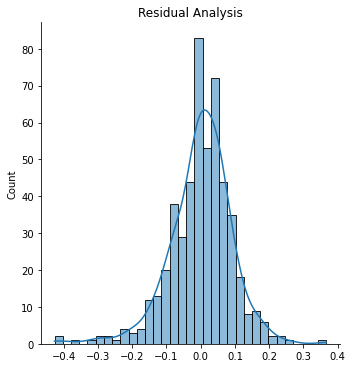

In [38]:
#calculating predicted y value from the final model
y_train_pred = lr_6.predict(X_train_lm_6)

#calculating residual and plotting
res = y_train - y_train_pred
sns.displot(res, kde = True)
plt.title("Residual Analysis")
plt.show()

#### Observation:

Residuals are normally distributed so the error terms normal distribution is verified

In [39]:
r2_score(y_true = y_train, y_pred = y_train_pred)

0.8322849355208716

## Step 8: Predicting values in test dataset

#### Sclaing test dataset using minmaxscaler (Normalisation)

In [40]:
#Applying scaling on the test dataset

num_vars = ['temp','atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sun,thu,tue,wed,bad_weather,good_weather,moderate_weather,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,1,0,1,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,1,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,1,0,1,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,1,0,0,0,1,0,0,1,0


In [41]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sun,thu,tue,wed,bad_weather,good_weather,moderate_weather,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.145455,0.163636,0.168182,0.100000,0.027273,0.654545,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.353363,0.370789,0.374881,0.300684,0.163248,0.476601,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Predicting in Test data set

In [42]:
y_test = df_test.pop('cnt')
X_test = df_test
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

X_test_lm_6.head()

,const,yr,temp,windspeed,jul,sept,sun,bad_weather,moderate_weather,spring,winter
184,1.0,0,0.831783,0.084219,1,0,0,0,1,0,0
535,1.0,1,0.901354,0.153728,0,0,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,0,0,0,1,0,1
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,0,0,0,0,0,0


In [43]:
#prediction from the final model
y_pred = lr_6.predict(X_test_lm_6)

##### R2 score for test set

In [44]:
#calculating r2 score of test data set
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8092

##### R2 score seems to be in the same range of training data set - so the model has good accuracy

## Step 9: Model Evaluation

1. Linearity of the model
2. Homoscedacity
3. Error terms are independent of each other
4. Error terms normal distribution - is already verified


#### 1. Linearity of the model

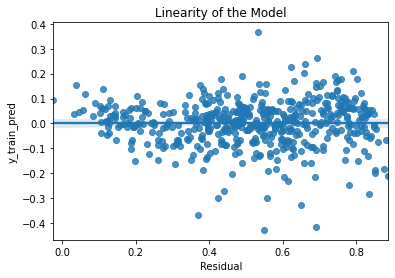

In [45]:
#plotting residual and y_train
sns.regplot(y_train_pred,res)
plt.title("Linearity of the Model")
plt.ylabel("y_train_pred")
plt.xlabel("Residual")
plt.show()

##### Observation:
   - we can clearly see the model is linear

#### 2. Homoscedacity

Text(0, 0.5, 'y_pred')

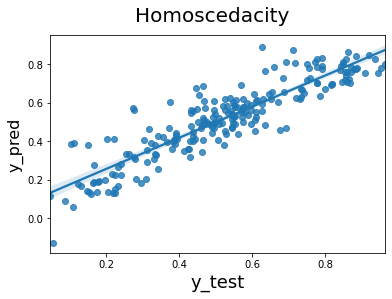

In [46]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
sns.regplot(y_test, y_pred)
fig.suptitle('Homoscedacity', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

##### Observation:
   - Error terms have constant variance, thus it is verified

#### 3. Error terms should be independent

Text(0, 0.5, 'Error Terms')

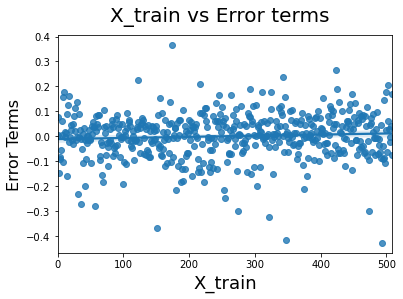

In [47]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()

#changing to 1D since Xtrain is not 1D
temp = [i for i in range(0,len(X_train_new),1)]

#plotting
sns.regplot(temp, res)
fig.suptitle('X_train vs Error terms', fontsize = 20)              # Plot heading 
plt.xlabel('X_train', fontsize = 18)                          # X-label
plt.ylabel('Error Terms', fontsize = 16)

##### Observation:
   - Error terms are independent of each other

# Interpretation of results

In [48]:
#displaying slope and intercept of all variables
lr_6.params

const               0.258592
yr                  0.234574
temp                0.449323
windspeed          -0.141044
jul                -0.069784
sept                0.052198
sun                -0.044329
bad_weather        -0.285866
moderate_weather   -0.079670
spring             -0.114692
winter              0.043831
dtype: float64

### 1. Linear equation of the model    
    cnt = 0.258592 + 0.449323*temp + 0.234574*yr + 0.052198*sept + 0.043831*winter - 0.141044*windspeed - 0.069784*jul
        - 0.044329*sun - 0.285866*bad_weather - 0.079670*moderate_weather - 0.114692*spring
        
    Note: Positive coefficients indicate increare in values leads to increase in count, and negative coefficients indicatte increase in values leads to decrease in count

### 2. R2 Score
- Training data - 0.8322
- Test data - 0.8092

### 3. variables significant in predicting the demand for shared bikes based on linear equation are,


- temperature               
- windspeed          
- july month               
- sept month          
- sunday              
- bad_weather        
- moderate_weather   
- spring season          
- winter season  

##### Description of variables for the bike demands
- Temp is the most significant variable with the largest coefficient.
- Sept, winter and year has a positive correlation with count
- weather influences the count more.
- bad weather leads to a high drop in count
- sept has most number of counts
- spring season has very less counts

## Buisness Conclusion

Based on the above analysis,

        1. Company should focus more on Non-rainy days (summer and fall season has more count)
        2. Company should focus more on temperature based bike availability
        3. september has a good relation with total count, so company should focus more on september month.
        4. Rains and bad weather impact the total count so they should focus on alternative measures such as providing a 
            rain cheater and so on.
        5. Spring season has a high negative correlation with count, means very less number of counts during spring season, 
            so company must try to focus during spring season.
          